**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [9]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [10]:
model = ExchangeEconomyClass()

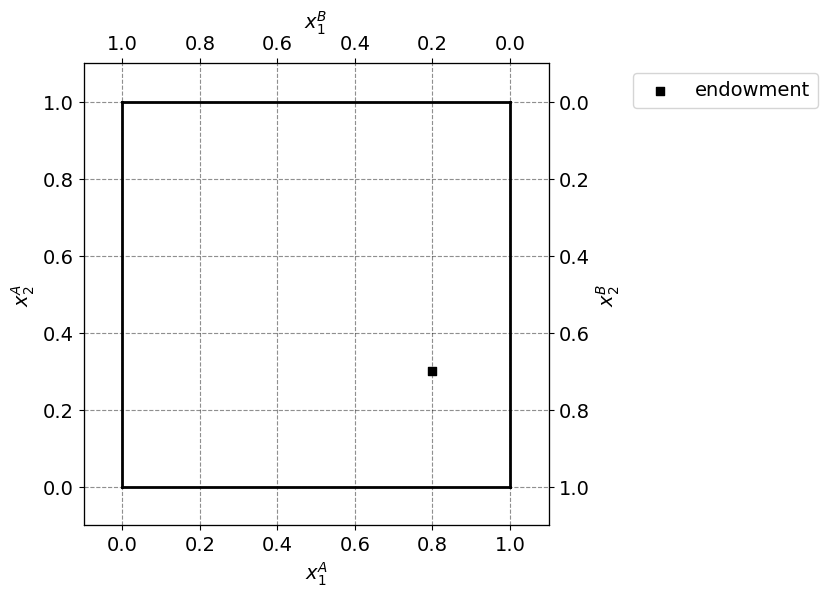

In [11]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

Solving the Inaugural Project Questions: 

**Q1. Ilustrate in the Edgeworth box the Pareto Improvements:** 


**Solving Q1:** The first question requests finding graphically the Pareto Improvements, i.e. the combinations of goods x1A, x2A, x1B and x2B, that leave players A and B better or as well off as they were with their initial endowments (w1A, w2A, w1B and w2B). 

This implies that the utility for each agent at different allocations has to be calculated, and then compared to the utility they get from their initial endowments.

The first step was to add the mathematical expressions of the utility functions to the ExchangeEconomy.py file. 

In [12]:
# Creating a grid of possible allocations, using the required number of points and range:
N = 75
x1A_grid = np.linspace(0, 1, N)
x2A_grid = np.linspace(0, 1, N)

# Utility at the initial endowments 
utility_A_endowment = model.utility_A(model.par.w1A, model.par.w2A)
utility_B_endowment = model.utility_B(1-model.par.w1A, 1-model.par.w2A)

# Initialize list to store the pareto improvements  
pareto_imp_x1A = []
pareto_imp_x2A = []

# Looping to create the list of pareto improvements
for x1A in x1A_grid:
    for x2A in x2A_grid:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= utility_A_endowment and model.utility_B(x1B, x2B) >= utility_B_endowment:
            pareto_imp_x1A.append(x1A)
            pareto_imp_x2A.append(x2A)

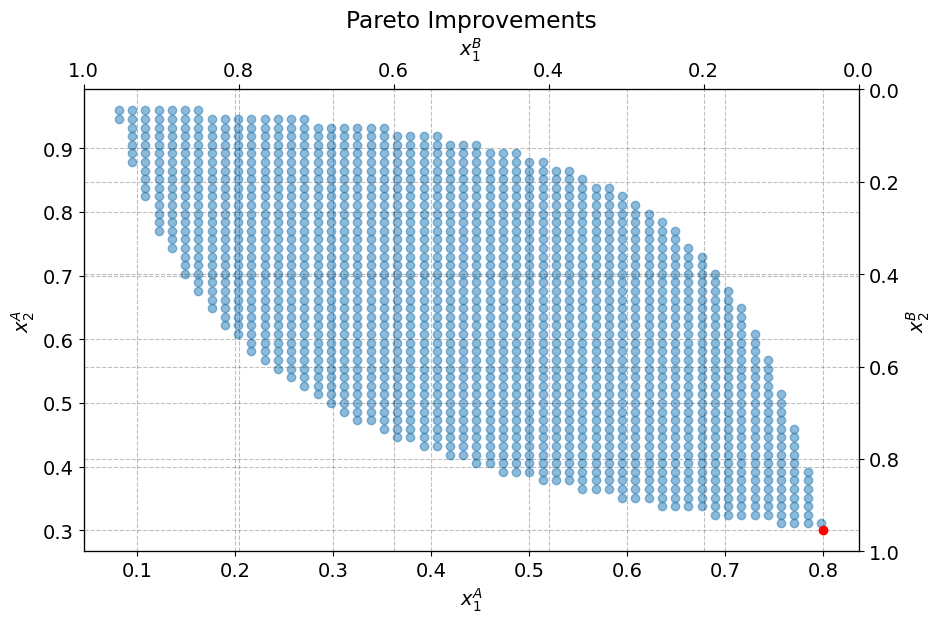

In [13]:

# Plotting the pareto improvements in the Edgeworth box
plt.figure(figsize=(10, 6))

    # Plot pareto improvements (of A)
plt.scatter(pareto_imp_x1A, pareto_imp_x2A, alpha=0.5)

    #Plot initial endowment:
plt.scatter(par.w1A,par.w2A, color='red', label='Initial Endowment', zorder=5)

    # Setting labels for A's allocations
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')

    # Add second x-axis for B's allocations
ax_B1 = plt.twiny()
ax_B1.set_xlabel('$x_1^B$', color='black')
ax_B1.set_xlim([1, 0])  # Invert axis to match the perspective for B
ax_B1.tick_params(axis='x', colors='black')

    # Add second y-axis for B's allocations
ax_B2 = plt.twinx()
ax_B2.set_ylabel('$x_2^B$', color='black')
ax_B2.set_ylim([1, 0])  # Invert axis to match the perspective for B
ax_B2.tick_params(axis='y', colors='black')

plt.title('Pareto Improvements')
plt.show()

This graphic shows the combinations of x1A and x2A (and consequently, x1B and x2B) that are Pareto improvements relative to the initial endowments. This means, at these allocations, both players are at least as well off as they were initially. The initial endowment is signalled in red. 

**Q2. Calculate the error in the market clearing conditions:**


**Solving Q2:** In exchange economies, there is market clearing when total demand for each good is equal to total supply. When markets do not clear, we have market clearing errors. The market clearing error is the discrepancy between the total demand and supply for a good.

To answer this question, we  calculate the market clearing error across a range of prices for good 1 (p1), while keeping the price of good 2 (p2) fixed as the numeraire (i.e. p2=1).

The first step to answer this question was to define the demand functions in the ExchangeEconomy.py file. p2=1 was established as the default value. 

In [14]:
# Range of prices p1:
P1 = np.linspace(0.5, 2.5, 75)  # Creates 75 prices from 0.5 to 2.5

# Calculate the Market Clearing Errors:

    # Initialize empty list of errors
errors = []
    # Looping through each price, calculate the errors:
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    errors.append((eps1, eps2))
    
# Printing the (first 20) market clearing errors:
df_errors = pd.DataFrame(errors, columns=['ε1', 'ε2'])
df_errors['p1'] = P1  # Add p1 values as a column
df_errors = df_errors[['p1', 'ε1', 'ε2']]  # Reorder columns for readability
print(df_errors.head(20))

          p1        ε1        ε2
0   0.500000  0.533333 -0.266667
1   0.527027  0.475214 -0.250450
2   0.554054  0.422764 -0.234234
3   0.581081  0.375194 -0.218018
4   0.608108  0.331852 -0.201802
5   0.635135  0.292199 -0.185586
6   0.662162  0.255782 -0.169369
7   0.689189  0.222222 -0.153153
8   0.716216  0.191195 -0.136937
9   0.743243  0.162424 -0.120721
10  0.770270  0.135673 -0.104505
11  0.797297  0.110734 -0.088288
12  0.824324  0.087432 -0.072072
13  0.851351  0.065608 -0.055856
14  0.878378  0.045128 -0.039640
15  0.905405  0.025871 -0.023423
16  0.932432  0.007729 -0.007207
17  0.959459 -0.009390  0.009009
18  0.986486 -0.025571  0.025225
19  1.013514 -0.040889  0.041441


**Q3: Find the market clearing price:**

**Solving Q3:** The market clearing price is the one that sets the market clearing errors as close to zero as possible. 

To answer this question, we need to find the p1 that minimizes the total market clearing errors, i.e. the sum of the errors. 

In [16]:
# Defining total market clearing errors 
def total_market_clearing_error(p1):
    eps1, eps2 = model.check_market_clearing(p1)
    return abs(eps1) + abs(eps2)

# Minimizing total market clearing errors
from scipy.optimize import minimize_scalar

result = minimize_scalar(total_market_clearing_error)
optimal_p1 = result.x

# Printing the market-clearing price
print(f"The market-clearing price p1 is: {optimal_p1:.4f}")

The market-clearing price p1 is: 0.9444


**Q4: Assume that A chooses the price to maximize her own utility**

**a) Find the allocation if only prices in P1 can be chosen.**

**b) Find the allocation if any positive price can be chosen**

In [26]:
import numpy as np
from scipy import optimize

# Given parameters
alpha = 1/3
beta = 2/3
omega1_A = 0.8
omega2_A = 0.3
p2 = 1  # Numeraire

# Utility functions
def uA(x1, x2, alpha=alpha):
    return x1*alpha * x2*(1-alpha)

# Demand functions for consumer A and B based on the given formulas
def demand_A(p1, omega1_A=omega1_A, omega2_A=omega2_A, alpha=alpha):
    x1_A = alpha * (p2*omega2_A + p1*omega1_A) / p1
    x2_A = (1-alpha) * (p2*omega2_A + p1*omega1_A) / p2
    return x1_A, x2_A

# Objective function to maximize A's utility by adjusting p1
def objective_A(p1, return_negative=True):
    x1_A, x2_A = demand_A(p1)
    utility_A = uA(x1_A, x2_A)
    if return_negative:
        return -utility_A  # We return the negative utility because we are minimizing
    return utility_A

# For 4a: Optimize over a discrete set of p1 values
def optimize_4a():
    N = 75  # Define the granularity of our price range
    P1 = np.linspace(0.5, 2.5, N)  # Possible prices
    utilities = np.array([objective_A(p1) for p1 in P1])
    max_index = np.argmax(utilities)
    return P1[max_index], -utilities[max_index]

# For 4b: Continuous optimization for any positive p1
def optimize_4b():
    bounds = [(0.01, None)]  # p1 > 0, avoiding division by zero
    result = optimize.minimize(objective_A, x0=[1], bounds=bounds)
    if result.success:
        return result.x[0], -result.fun
    else:
        return None, None

# Execute optimizations for 4a and 4b
optimal_p1_4a, max_utility_4a = optimize_4a()
print(f"4a: Optimal p1 = {optimal_p1_4a}, Maximum Utility for A = {max_utility_4a}")

optimal_p1_4b, max_utility_4b = optimize_4b()
if optimal_p1_4b is not None:
    print(f"4b: Optimal p1 = {optimal_p1_4b}, Maximum Utility for A = {max_utility_4b}")
else:
    print("Optimization for 4b was unsuccessful.")

4a: Optimal p1 = 0.5, Maximum Utility for A = 0.04839506172839506
4b: Optimal p1 = 39216527.60575247, Maximum Utility for A = 1239435.9579102022


This is beli's attempt to take out the utilities definition and to use the exchange economy: 

In [23]:
# Objective function to maximize A's utility by adjusting p1
def objective_A(p1, return_negative=True):
    x1_A, x2_A = model.demand_A(p1,p2=1)
    utility_A = model.utility_A(x1A,x2A)
    if return_negative:
        return -utility_A  # We return the negative utility because we are minimizing
    return utility_A

# For 4a: Optimize over a discrete set of p1 values
def optimize_4a():
    utilities = np.array([objective_A(p1) for p1 in P1])
    max_index = np.argmax(utilities)
    return P1[max_index], -utilities[max_index]

# For 4b: Continuous optimization for any positive p1
def optimize_4b():
    bounds = [(0.01, None)]  # p1 > 0, avoiding division by zero
    result = optimize.minimize(objective_A, x0=[1], bounds=bounds)
    if result.success:
        return result.x[0], -result.fun
    else:
        return None, None

# Execute optimizations for 4a and 4b
optimal_p1_4a, max_utility_4a = optimize_4a()
print(f"4a: Optimal p1 = {optimal_p1_4a}, Maximum Utility for A = {max_utility_4a}")

optimal_p1_4b, max_utility_4b = optimize_4b()
if optimal_p1_4b is not None:
    print(f"4b: Optimal p1 = {optimal_p1_4b}, Maximum Utility for A = {max_utility_4b}")
else:
    print("Optimization for 4b was unsuccessful.")

4a: Optimal p1 = 0.5, Maximum Utility for A = 1.0
4b: Optimal p1 = 1.0, Maximum Utility for A = 1.0


**Q5. Assume that A is the Market Maker.** 

**a) Find the allocation if the choice set is restricted to C**

**b)Find the allocation if no further restrictions are imposed**

In [27]:
from scipy.optimize import minimize

# Initial endowments and utilities
omega1_A, omega2_A = 0.8, 0.3
omega1_B, omega2_B = 1 - omega1_A, 1 - omega2_A
initial_utility_A = uA(omega1_A, omega2_A)
initial_utility_B = uB(omega1_B, omega2_B)

# Constraints for 5a: Both A and B at least as well-off as initially
def constraint_5a(x):
    # x = [x1_A, x2_A]
    x1_B, x2_B = 1 - x[0], 1 - x[1]
    return [
        uA(x[0], x[1]) - initial_utility_A,
        uB(x1_B, x2_B) - initial_utility_B
    ]

# Constraints for 5b: B at least as well-off as initially, no other restrictions
def constraint_5b(x):
    # x = [x1_A, x2_A]
    x1_B, x2_B = 1 - x[0], 1 - x[1]
    return uB(x1_B, x2_B) - initial_utility_B

# Optimization setup for 5a
def optimize_5a():
    x0 = [omega1_A, omega2_A]  # Initial guess based on endowments
    constraints = {'type': 'ineq', 'fun': constraint_5a}
    bounds = [(0, 1), (0, 1)]  # Allocations must be in [0, 1]
    result = minimize(lambda x: -uA(x[0], x[1]), x0, bounds=bounds, constraints=constraints)
    if result.success:
        return result.x, uA(*result.x)
    else:
        return None, None

# Optimization setup for 5b
def optimize_5b():
    x0 = [omega1_A, omega2_A]  # Initial guess
    constraints = {'type': 'ineq', 'fun': constraint_5b}
    bounds = [(0, 1), (0, 1)]
    result = minimize(lambda x: -uA(x[0], x[1]), x0, bounds=bounds, constraints=constraints)
    if result.success:
        return result.x, uA(*result.x)
    else:
        return None, None

# Executing optimizations
allocation_5a, utility_5a = optimize_5a()
allocation_5b, utility_5b = optimize_5b()

print(f"5a: Optimal Allocation = {allocation_5a}, Utility for A = {utility_5a}")
print(f"5b: Optimal Allocation = {allocation_5b}, Utility for A = {utility_5b}")

NameError: name 'uB' is not defined

**Q6 a) Find the Utilitarian social planner allocation**


**Solving Q6 a)**: The first step in the maximization problem is to define the utilitarian social utility function that consists of summing agents' A and B utilities- the aggregate utility. 

After that we need to solve the maximization problem using an optimizer like scipy.optimize.minimize to find the allocation that maximizes the aggregate utility. To do so, we need to deine the objective function, which in this case is the  negative of the aggregate_utility because scipy.optimize.minimize minimizes rather than maximizes.

Using this optimizer, we needed to start with an initial guess. In this case we decided to start with the "middle point", where A and B allocations of good 1 and 2 is 0.5. 

In [39]:
# Defining the utilitarian aggregate utility function
def aggregate_utility(x):
    x1A, x2A = x
    x1B, x2B = 1 - x1A, 1 - x2A  # B's allocation is what remains from A's allocation
    utility_A = model.utility_A(x1A, x2A)
    utility_B = model.utility_B(x1B, x2B)
    return utility_A + utility_B

# Defining the objective function
def objective(x):
    return -aggregate_utility(x)

# Bounds for x1A and x2A- have to be between 0 and 1
bounds = [(0, 1), (0, 1)]

# Initial guess- a guess is needed to initialize the optmizer
initial_guess = [0.5, 0.5]

from scipy.optimize import minimize 

# Solve the optimization problem
result = minimize(objective, initial_guess, bounds=bounds)

social_opt_x1A = result.x[0]
social_opt_x2A = result.x[1]
social_opt_x1B = 1-result.x[0]
social_opt_x2B = 1-result.x[1]

# Print the optimal allocation for A and the derived allocation for B
print(f"Optimal allocation for A: x1A={social_opt_x1A}, x2A={social_opt_x2A}")
print(f"Optimal allocation for B: x1B={social_opt_x1B}, x2B={social_opt_x2B}")

Optimal allocation for A: x1A=0.3333333659693852, x2A=0.6666666260640767
Optimal allocation for B: x1B=0.6666666340306149, x2B=0.3333333739359233


**Q6 b) Ilustrate graphically**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


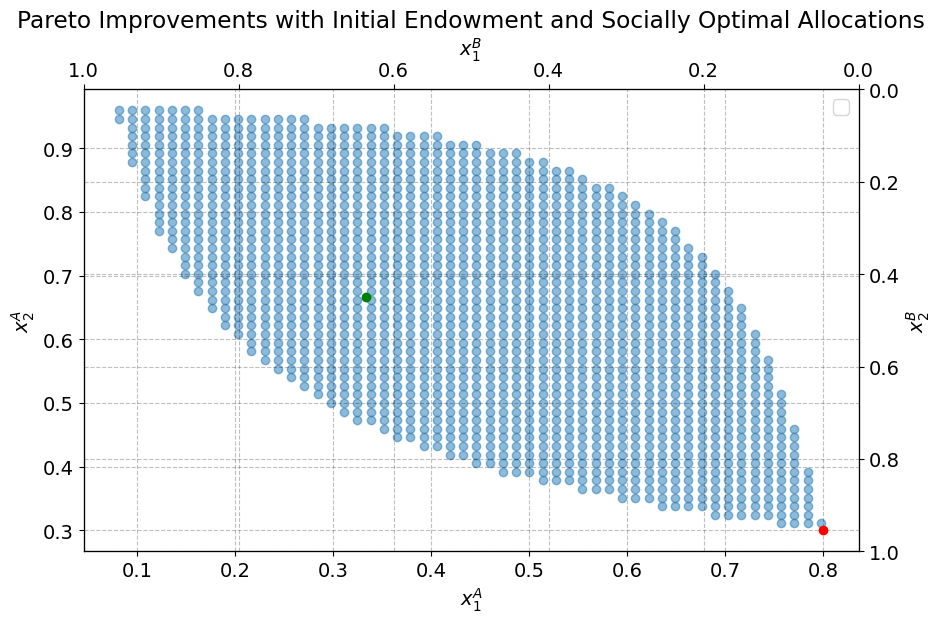

In [40]:
plt.figure(figsize=(10, 6))

# Scatter plot for pareto improvements 
plt.scatter(pareto_imp_x1A, pareto_imp_x2A, alpha=0.5, label="Pareto Improvements")

# Plot initial endowment and optimal allocation
plt.scatter(par.w1A,par.w2A, color='red', label='Initial Endowment', zorder=5)
plt.scatter(social_opt_x1A, social_opt_x2A, color='green', label='Socially Optimal Allocation', zorder=5)

# Setting labels for A's allocations
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')

# Add second x-axis for B's allocations
ax_B1 = plt.twiny()
ax_B1.set_xlabel('$x_1^B$', color='black')
ax_B1.set_xlim([1, 0])  # Invert axis to match the perspective for B
ax_B1.tick_params(axis='x', colors='black')

# Add second y-axis for B's allocations
ax_B2 = plt.twinx()
ax_B2.set_ylabel('$x_2^B$', color='black')
ax_B2.set_ylim([1, 0])  # Invert axis to match the perspective for B
ax_B2.tick_params(axis='y', colors='black')

plt.title('Pareto Improvements with Initial Endowment and Socially Optimal Allocations')
plt.legend()
plt.show()


In this EdgeWorth Box you can find in blue the pareto improvments from the initial endowment, in red the initial endowment and in green the utilitarian socially optimum. 

**!!!! In question 6b) we still need to comapre the results with 3)-5) and Discuss the pros and cons of the various allocations. So we still need the answers of those questions!!!!**

**Q7: Draw a set W with 50 elements:**

**Solving Q7:** To answer this question, we need to create a randomly generated, uniform distribution of w1A and w2A. We have printed the first 20 elements. 

In [42]:
# Number of elements in the set
num_elements = 50

# Generating random endowment values for omega_1^A and omega_2^A
omega_1_A = np.random.uniform(0, 1, num_elements)
omega_2_A = np.random.uniform(0, 1, num_elements)

# Combining omega_1_A and omega_2_A to create the set W
W = list(zip(omega_1_A, omega_2_A))

# Printing the first few elements of the set W
print("First 20 in W:")
for i in range(20):
    print(W[i])

First 20 in W:
(0.08071062265535756, 0.106978708552385)
(0.1531887108557678, 0.31301327259839173)
(0.6247279227971966, 0.507267709285241)
(0.7821981017003917, 0.5617596832400563)
(0.4194461665652436, 0.6661632528512567)
(0.5023231848793268, 0.41554336345930254)
(0.6449362175083104, 0.5117338117083702)
(0.883326976256271, 0.560424817459792)
(0.8408848429397047, 0.1977733361056191)
(0.3785010778943594, 0.10033201373899403)
(0.607626398579889, 0.6624593752594289)
(0.43832831354087975, 0.8256385094670771)
(0.5422093797334958, 0.41029607752878106)
(0.6161481031684165, 0.7100304516573642)
(0.19188610985541177, 0.5650766765237738)
(0.5210165095450657, 0.21846784776465433)
(0.6730772828357874, 0.07274842809373072)
(0.11876382969922594, 0.05762132189598268)
(0.42546409120217554, 0.7087073236212532)
(0.21681520951577005, 0.5588780264275887)


**Q8: Find the market equilibrium allocation**

**Solving Q8:** This question asks to find the market equilibrium allocation for a random set of initial endowments. From Q7 we already have the set of initial endowments.  

To find the equilibrium allocations, economically speaking, one needs to finds the excess demands, which correspond to the demands fucntions from consumers A and B and subtracingt the total endowment.

An economy is in equilibrium when demand equals supply, i.e., when excess demand is equal to zero. To find the equilibrium for each set of endowments, we have looped through the sets of endowments, using a root-finding method called scipy.optimize.brentq, to find the price p1 that makes excess demand equal to zero. 

In [68]:
# Defining Excess Demand:
    # Excess demand for good 1
def excess_demand_good1(p1, w1A, w2A, model):
    model.par.w1A, model.par.w2A = w1A, w2A
    
    x1A, _ = model.demand_A(p1)
    x1B, _ = model.demand_B(p1)
    
    
    return (x1A + x1B) - 1  # Total endowment for good 1 is normalized to 1

   # Excess demand for good 2
def excess_demand_good2(p1, w1A, w2A, model):
    model.par.w1A, model.par.w2A = w1A, w2A
    
    _, x2A = model.demand_A(p1)
    _, x2B = model.demand_B(p1)
    
    return (x2A + x2B) - 1  # Total endowment for good 2 is normalized to 1

from scipy.optimize import brentq

equilibrium_prices = []
equilibrium_allocations = []

for w1A, w2A in W:
    try:
        # Assuming p2 is normalized to 1, we find p1 that zeroes excess demand for good 1
        equilibrium_price = brentq(excess_demand_good1, 0.01, 10, args=(w1A, w2A, model))
        equilibrium_prices.append(equilibrium_price)
        
        # Calculate equilibrium allocations using the equilibrium price
        x1A, x2A = model.demand_A(equilibrium_price)
        equilibrium_allocations.append((x1A, x2A))
    except ValueError:
        print("No solution found for a set of endowments.")

equilibrium_x1A, equilibrium_x2A = zip(*equilibrium_allocations)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


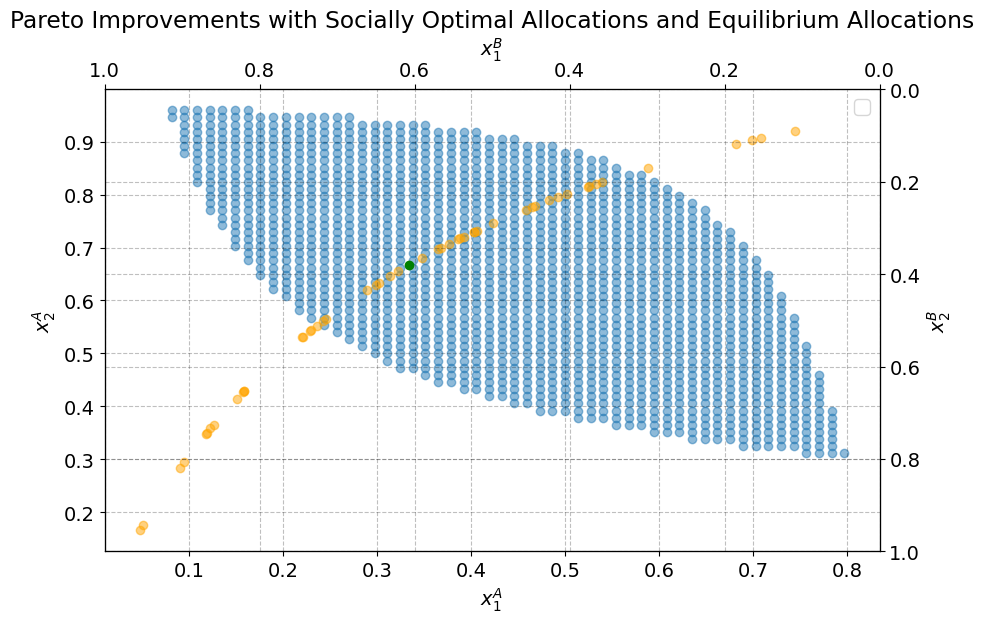

In [69]:
plt.figure(figsize=(10, 6))

# Scatter plot for pareto improvements 
plt.scatter(pareto_imp_x1A, pareto_imp_x2A, alpha=0.5, label="Pareto Improvements")

# Plot equilibrium allocations: 
plt.scatter(equilibrium_x1A, equilibrium_x2A,color='orange', alpha=0.5, label='Equilibrium Allocations')

# Plot socially ptimal allocation
plt.scatter(social_opt_x1A, social_opt_x2A, color='green', label='Socially Optimal Allocation', zorder=5)

# Setting labels for A's allocations
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')

# Add second x-axis for B's allocations
ax_B1 = plt.twiny()
ax_B1.set_xlabel('$x_1^B$', color='black')
ax_B1.set_xlim([1, 0])  # Invert axis to match the perspective for B
ax_B1.tick_params(axis='x', colors='black')

# Add second y-axis for B's allocations
ax_B2 = plt.twinx()
ax_B2.set_ylabel('$x_2^B$', color='black')
ax_B2.set_ylim([1, 0])  # Invert axis to match the perspective for B
ax_B2.tick_params(axis='y', colors='black')

plt.title('Pareto Improvements with Socially Optimal Allocations and Equilibrium Allocations')
plt.legend()
plt.show()
